In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc
import pandas as pd

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine,reflect=True)

In [6]:
# View all of the classes that automap found
for mappedclass in Base.classes:
    print(mappedclass)

<class 'sqlalchemy.ext.automap.measurement'>
<class 'sqlalchemy.ext.automap.station'>


In [7]:
# Save references to each table
Base = automap_base()
Base.prepare(engine, reflect=True)
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
conn = engine.connect()

Base.metadata.create_all(conn)

from sqlalchemy.orm import Session
session = Session(bind=engine)

Base.classes.keys()

['measurement', 'station']

In [9]:
engine.execute('SELECT * FROM measurement').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [10]:
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date = recent_date[0]
print(f"The most recent date in the data set is {recent_date}.")

The most recent date in the data set is 2017-08-23.


In [12]:
one_year = dt.date(2017,8,23) - dt.timedelta(days=365)
print(f"The date one year from the last date in data set is {str(one_year)}.")

The date one year from the last date in data set is 2016-08-23.


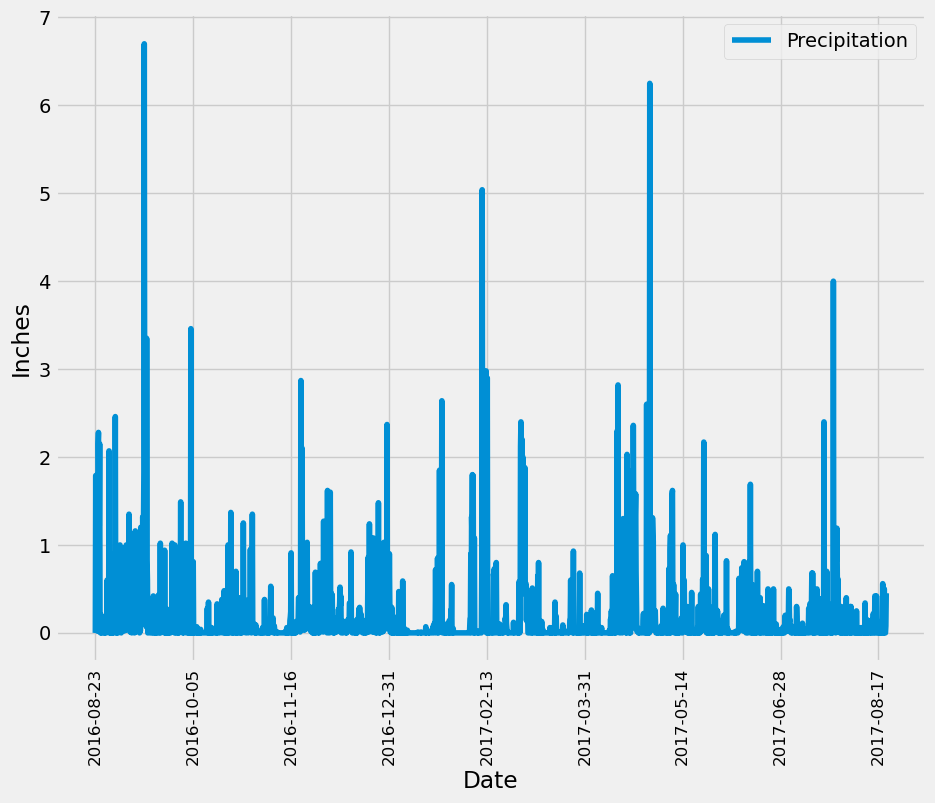

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year = dt.date(2017,8,23) - dt.timedelta(days=365)
str(one_year)

# Perform a query to retrieve the data and precipitation scores
prcp_last_year = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date <= recent_date).\
    filter(measurement.date >= one_year).all()
prcp_last_year

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_last_year, columns=['Date','Precipitation'])
prcp_df = prcp_df.set_index('Date', drop=True)

# Sort the dataframe by date
prcp_df = prcp_df.sort_values('Date', ascending=True)
prcp_df.dropna(inplace=True)

# # Use Pandas Plotting with Matplotlib to plot the date
prcp_df.plot(figsize=(10,8), legend=True, grid=True)
plt.xticks(fontsize=12, rotation=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()


In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(station).distinct().count()
print(f"There are {total_stations} stations.")

There are 9 stations.


In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == active_stations[0][0]).all()

most_active_station

print(f'The station with the greatest number of observations is {active_stations[0][0]}.')
print(f'The lowest tobs for station {active_stations[0][0]} is {most_active_station[0][0]}.')
print(f'The highest tobs for station {active_stations[0][0]} is {most_active_station[0][1]}.')
print(f'The average tobs for station {active_stations[0][0]} is {round(most_active_station[0][2],1)}.')

The station with the greatest number of observations is USC00519281.
The lowest tobs for station USC00519281 is 54.0.
The highest tobs for station USC00519281 is 85.0.
The average tobs for station USC00519281 is 71.7.


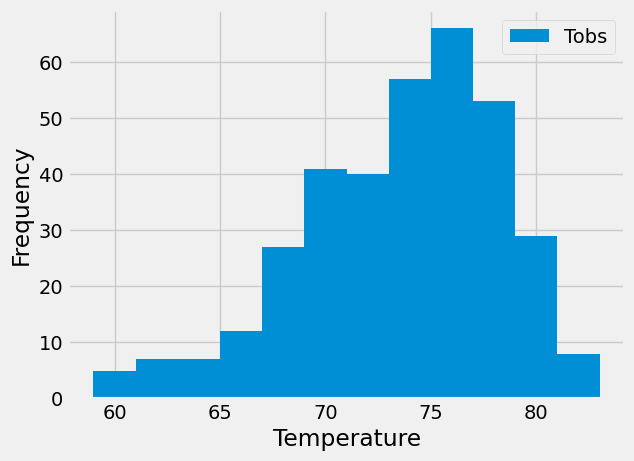

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station = session.query(measurement.tobs, measurement.date).\
    filter(measurement.date <= recent_date).\
    filter(measurement.date >= one_year).\
    filter(measurement.station == "USC00519281").order_by(measurement.tobs).all()

most_active_station_df = pd.DataFrame(most_active_station, columns=['Tobs', 'Date'])
most_active_station_df.dropna()

most_active_station_df.hist(legend=True, grid=True, bins=12)
plt.title(None)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


# Close session

In [19]:
# Close Session
session.close()